In [1]:
import keras
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import random

C:\Users\Eireen\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
data = {}
with open('train.json') as json_data:
    data = json.load(json_data)

In [7]:
int(data['images'][1002]['imageId'])
#data['annotations'][0]['labelId']

1003

In [15]:
#padding function


def add_padding(img):
    desired_size = 600
    old_size = img.size  # old_size[0] is in (width, height) format
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    im = img.resize(new_size, Image.ANTIALIAS)
    padding = Image.new("RGB", (desired_size, desired_size), color =(0,0,0))
    padding.paste(im, ((desired_size-new_size[0])//2, (desired_size-new_size[1])//2))
    
    
    return padding




In [12]:


#loading images + labels

ids = data['images']
ys = data['annotations']


batches_idx = random.sample(range(0,10000), 10000)
val_idx = batches_idx[0:999]

def get_batch_idx(batchnr): #1 tm 9 for dataset of 10 000 images and 9 batches + 1 validation set
    if(batchnr > 9 or batchnr < 1):
        print("wrong batchnr!!!!!!!!!")
    else:
        return batches_idx[1000*batchnr:1000*batchnr+999]

def load_images(idx):
    batchx = []
    batchy = []
    for i in idx:
        imgid = ids[i]
        y = ys[i]
   # for imgid, y in zip(ids, ys):
        try:
            img = image.load_img("json_images\{}.jpg".format(imgid["imageId"]))
            x = image.img_to_array(add_padding(img))

            batchx.append(x)
            batchy.append(y["labelId"])

        except:
            continue


In [16]:

#train in batches

#create model here

#model = create_model()

#load validation data for validation

valx, valy = load_images(val_idx)



for batch in range(1,2): #1 tm 9 for dataset of 10 000 images and 9 batches + 1 validation set
    
    batch_idx = get_batch_idx(batch)
    batchx, batchy = load_images(batch_idx)
    print("Loaded batch {} with {} datapoints".format(batch, len(batchx)))
    
    #train model with batch here
    
    #model.fit(batchx, batchy)
    
    #optionally do intermediate validation 
    #model.fit(batchx, batchy, validation_data=(valx,valy))
    
    print("done training batch")
    


    
#final validation
#model.evaluate(valx, valy)






Loaded batch 1
done training batch
Loaded 883 training points and 106 validation points


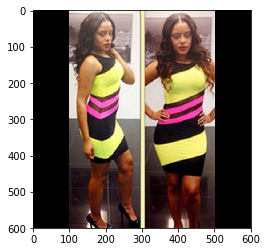

In [34]:

# cell to look at individual images, just for testing, not important :)


#img = cv2.imread("C:\Users\Eireen\Documents\ML\project\json_images\9998.jpg")
img = image.load_img("json_images\9968.jpg")


x = image.img_to_array(add_padding(img))
#print("img type: {} x type: {} x shape: {}".format(type(img), type(x), x.shape))
plt.imshow(x.astype(np.uint8))


